In [1]:
%run Functions_2911.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy import signal as sg
from scipy.signal import savgol_filter
from scipy.stats import chi2
from scipy.ndimage import convolve1d
from scipy.ndimage import gaussian_filter1d

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import sklearn.metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EmpiricalCovariance, MinCovDet

In [5]:
#importing metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#suppress warning messages
import warnings
warnings.filterwarnings('ignore')

import pickle
from sklearn.cross_decomposition import PLSRegression

In [6]:
df = pd.read_csv('god_bar_kap.csv')

In [7]:
df.head()

,Sample ID,0,1,2,3,4,5,6,7,8,...,798,799,800,Moisture,Oil,S.Silica,Label,T.Ash,Protein,Fibre
0,RICE BRAN 058191,0.309228,0.308953,0.308687,0.308433,0.308196,0.307977,0.307764,0.307541,0.307296,...,0.402269,0.403084,0.403723,7.69,12.72,6.84,KAPILA,NaN,NaN,NaN
1,RICE BRAN 059896,0.194125,0.193997,0.193875,0.193753,0.193627,0.193493,0.193356,0.193219,0.193084,...,0.319006,0.319854,0.320802,8.07,15.63,6.58,KAPILA,NaN,NaN,NaN
2,RICE BRAN 060261,0.169714,0.169359,0.169023,0.168689,0.168339,0.167965,0.167581,0.167199,0.166831,...,0.281447,0.282463,0.283346,8.03,13.45,7.37,KAPILA,NaN,NaN,NaN
3,RICE BRAN 060348,0.098795,0.098526,0.098265,0.098001,0.097724,0.097430,0.097136,0.096859,0.096607,...,0.210686,0.211496,0.212450,6.32,8.90,7.20,KAPILA,NaN,NaN,NaN
4,RICE BRAN 060448,0.104633,0.104344,0.104061,0.103781,0.103503,0.103231,0.102971,0.102731,0.102514,...,0.239956,0.240688,0.241654,6.41,13.06,3.40,KAPILA,NaN,NaN,NaN


In [8]:
l = [*(set(df['Label']))]

In [9]:
l

['KAPILA', 'OLD', 'NEW']

In [10]:
df_1 = df[df['Label'] == l[2]]

In [11]:
df_2 = df.drop(df_1.index)

In [12]:
r1,r2 = df_2['Moisture'].max() , df_2['Moisture'].min()

<AxesSubplot:>

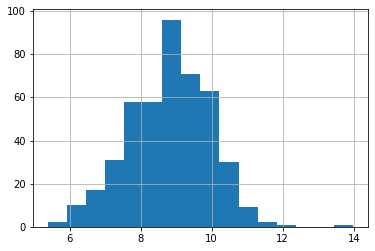

In [13]:
df_2['Moisture'].hist(bins = 16)

choosing from 7-11 for the experiment

In [14]:
df_3 = df_2.query('Moisture >=7 & Moisture <10.5')

<AxesSubplot:>

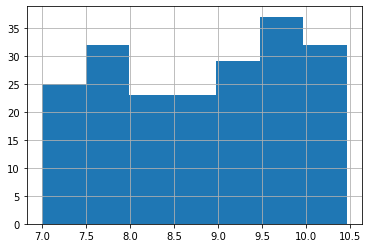

In [15]:
df_3[df_3['Label'] == 'KAPILA']['Moisture'].hist(bins = 7)

<AxesSubplot:>

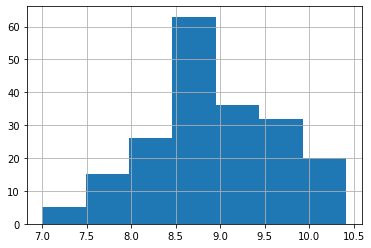

In [16]:
df_3[df_3['Label'] == 'OLD']['Moisture'].hist(bins = 7)

In [17]:
 df_kap_8_10 = df_3[df_3['Label'] == 'KAPILA'].query('Moisture>=8.0 & Moisture<10')

In [18]:
 df_old_8_10 = df_3[df_3['Label'] == 'OLD'].query('Moisture>=8.0 & Moisture<10')

In [19]:
df_final = uniform_selection(df_3,0.7,'Moisture',60)

<AxesSubplot:>

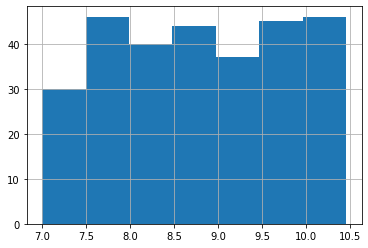

In [20]:
df_final['Moisture'].hist(bins = 7)

<AxesSubplot:>

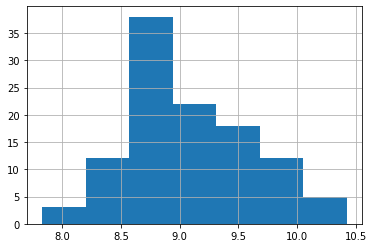

In [21]:
df_left = pd.concat([df_3,df_final]).drop_duplicates(keep=False)
df_left['Moisture'].hist(bins = 7)

In [22]:
df_final[df_final['Label'] == 'KAPILA'].shape

(157, 809)

<AxesSubplot:>

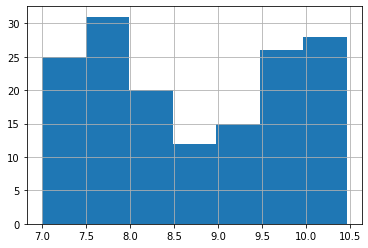

In [23]:
df_final[df_final['Label'] == 'KAPILA']['Moisture'].hist(bins = 7)

<AxesSubplot:>

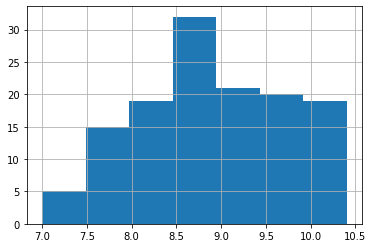

In [24]:
df_final[df_final['Label'] == 'OLD']['Moisture'].hist(bins = 7)

In [25]:
df_final[df['Label'] == 'OLD'].shape

(131, 809)

In [26]:
df_left[df_left['Label'] == 'OLD'].shape

(66, 809)

In [27]:
df_left[df_left['Label'] == 'KAPILA'].shape

(44, 809)

<AxesSubplot:>

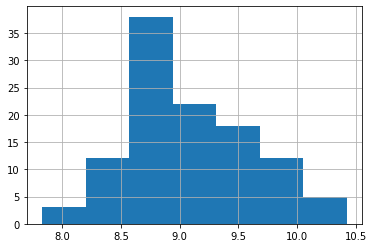

In [28]:
df_left['Moisture'].hist(bins = 7)

In [29]:
Xs_final_df = uniform_selection(df_kap_8_10,0.5,'Moisture',20)

<AxesSubplot:>

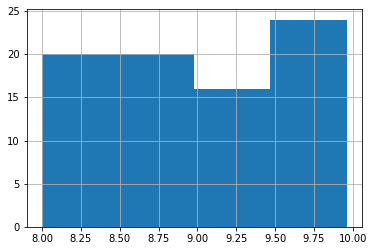

In [30]:
Xs_final_df['Moisture'].hist(bins = 4)

In [31]:
Xt_final_df = uniform_selection(df_old_8_10,0.5,'Moisture',20)

<AxesSubplot:>

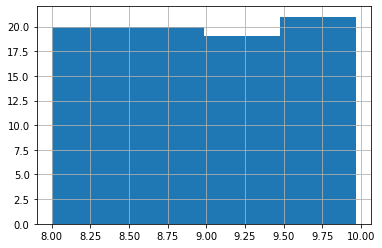

In [32]:
Xt_final_df['Moisture'].hist(bins = 4)

In [33]:
y = df_final.Moisture

In [34]:
df_train,df_eval,y_train,y_eval=split_data(df_final,y)

In [35]:
X_train=df_train.iloc[:,21:-57]
X_eval=df_eval.iloc[:,21:-57]

In [36]:
X_train.columns=list(int(j) for j in range(X_train.shape[1]))

In [37]:
X_eval.columns=list(int(j) for j in range(X_eval.shape[1]))

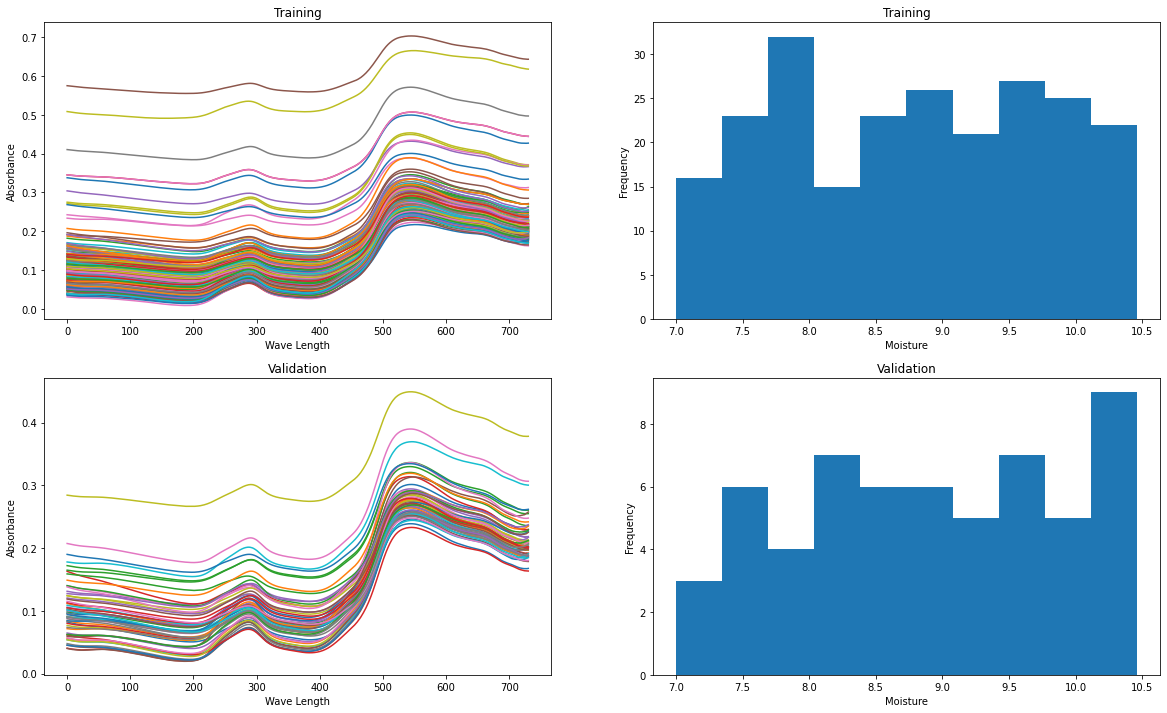

In [38]:
plot_train_test(X_train, X_eval, y_train, y_eval, 'Moisture')

In [39]:
arr_train = np.asarray(X_train, dtype = 'float64')
arr_eval = np.asarray(X_eval, dtype = 'float64')
y_train = y_train.reset_index(drop = True)
y_eval = y_eval.reset_index(drop = True)
y_train_arr = np.asarray(y_train, dtype = 'float64')
y_eval_arr = np.asarray(y_eval, dtype = 'float64')

In [40]:
train_arr = derivate_second(detrending(snv(moving_smoothing(X_train.values,21))),21,2)
eval_arr = derivate_second(detrending(snv(moving_smoothing(X_eval.values,21))),21,2)

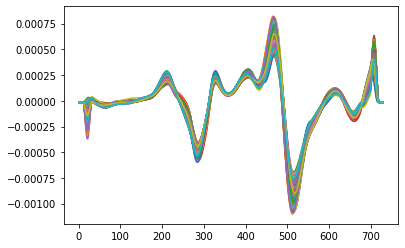

In [41]:
plt.plot(train_arr.T)
plt.show()

In [42]:
plsr_final = PLSRegression(n_components = 8) #best_number of components 
plsr_final.fit(train_arr, y_train)
train_pred_final = plsr_final.predict(train_arr)
eval_pred_final = plsr_final.predict(eval_arr)
#calculate metrics for both training and validation prediction
r2_train, adj_r2_train, mape_train = metric_cal(y_train_arr, train_pred_final, train_arr.shape[1])
r2_valid, adj_r2_valid, mape_valid = metric_cal(y_eval_arr, eval_pred_final, eval_arr.shape[1])
#metrics
print("Train R2  :", r2_train)
print('Train MAPE:', mape_train)
print("Valid R2  :", r2_valid)
print('Valid MAPE:', mape_valid)

Train R2  : 0.7083354460262521
Train MAPE: 0.047427862388882296
Valid R2  : 0.6751977506959188
Valid MAPE: 0.04746696018057338


In [43]:
y_train_arr = np.asarray(y_train, dtype = float).reshape((-1,1))
print(y_train_arr.shape)
print(train_pred_final.shape)

(230, 1)
(230, 1)


In [44]:
y_eval_arr = np.asarray(y_eval, dtype = float).reshape((-1,1))
print(y_eval_arr.shape)
print(eval_pred_final.shape)

(58, 1)
(58, 1)


Percentage of values that have absolute error < 1 : 95.21739130434783
Percentage of values that have absolute error < 1 : 93.10344827586206


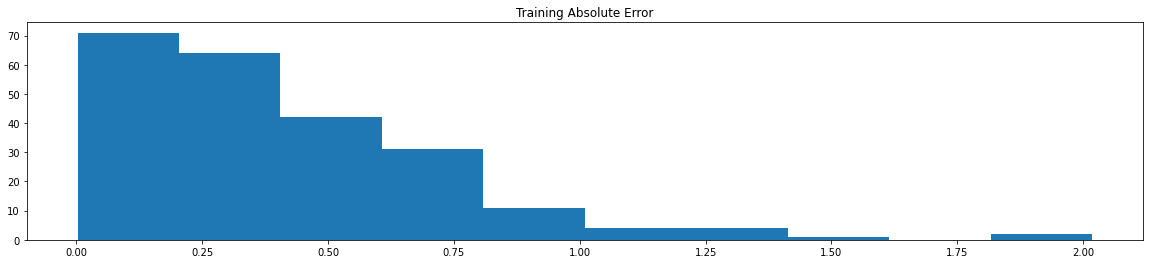

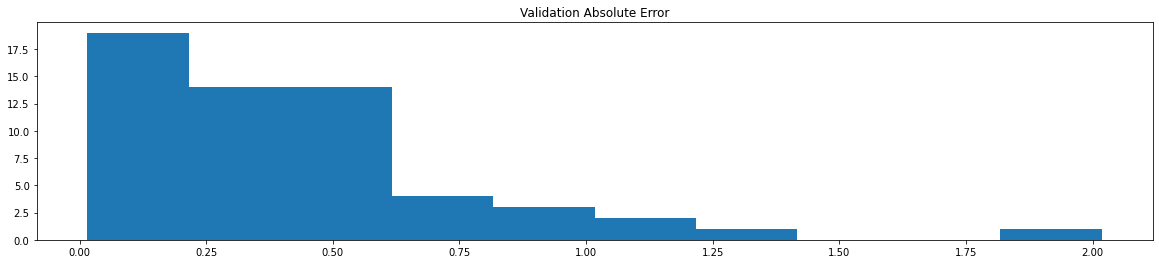

In [45]:
plot_error_histograms(y_train_arr, train_pred_final, y_eval_arr, eval_pred_final)

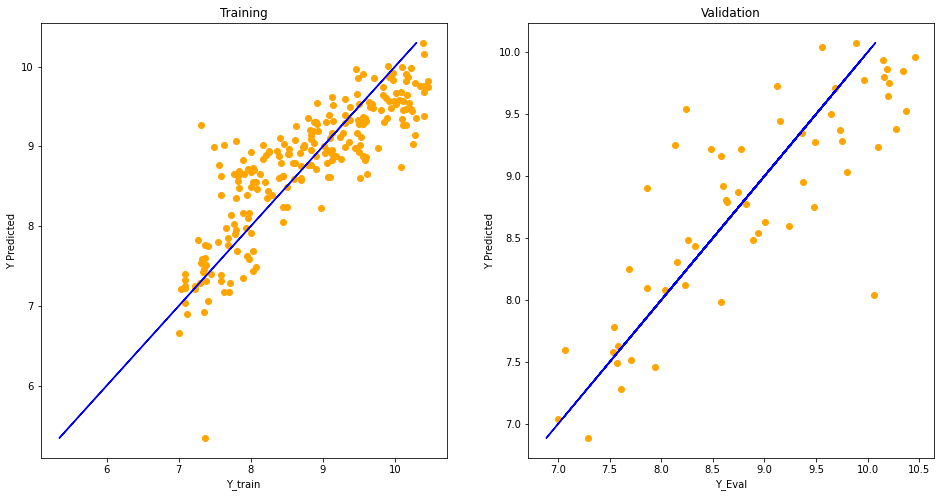

In [46]:
pred_plot(y_train_arr, train_pred_final, y_eval_arr, eval_pred_final, 'Moisture')

In [47]:
Xs = Xs_final_df.iloc[:,21:-57]
Xt = Xt_final_df.iloc[:,21:-57]

In [48]:
Xs.columns=list(int(j) for j in range(Xs.shape[1]))
Xt.columns=list(int(j) for j in range(Xt.shape[1]))

In [49]:
arr_Xs = np.asarray(Xs, dtype = 'float64')
arr_Xt = np.asarray(Xt, dtype = 'float64')

In [50]:
arr_Xs = derivate_second(detrending(snv(moving_smoothing(arr_Xs,21))),21,2)
arr_Xt = derivate_second(detrending(snv(moving_smoothing(arr_Xt,21))),21,2)

In [51]:
%run di_pls_func_4.py

In [52]:
import di_pls_model_4 as dipls

In [53]:
y_t = np.array(y_train)
y_t = np.expand_dims(y_t,1)

In [54]:
y_t.shape

(230, 1)

In [55]:
train_arr.shape

(230, 731)

In [56]:
arr_Xs.shape

(80, 731)

In [57]:
arr_Xt.shape

(80, 731)

In [58]:
eval_arr.shape

(58, 731)

In [59]:
y_eval_arr.shape

(58, 1)

In [86]:
best_i = 0
best_mape = 100
m_2 = dipls.model(train_arr,y_t,arr_Xs,arr_Xt,8,10)
m_2.fit(0)
yhat_dipls,err = m_2.predict(x_test = eval_arr,y_test = y_eval_arr, rescale = eval_arr)
r2_valid, adj_r2_valid, mape_valid = metric_cal(y_eval_arr, yhat_dipls, y_eval_arr.shape[1])

In [63]:
best_i = 0
best_mape = 100
lamb_r = [10**i for i in range(10)]
for i in lamb_r:
    m_2 = dipls.model(train_arr,y_t,arr_Xs,arr_Xt,8,100)
    m_2.fit(i)
    yhat_dipls,err = m_2.predict(x_test = eval_arr,y_test = y_eval_arr, rescale = eval_arr)
    r2_valid, adj_r2_valid, mape_valid = metric_cal(y_eval_arr, yhat_dipls, y_eval_arr.shape[1])
    if (mape_valid<best_mape):
        best_mape = mape_valid
        best_i = i

In [65]:
best_i

1000000000

In [66]:
best_mape

0.04735103072167299

In [67]:
m_2 = dipls.model(train_arr,y_t,arr_Xs,arr_Xt,8,100)
m_2.fit(best_i)
yhat_dipls,err = m_2.predict(x_test = eval_arr,y_test = y_eval_arr, rescale = eval_arr)
r2_valid, adj_r2_valid, mape_valid = metric_cal(y_eval_arr, yhat_dipls, y_eval_arr.shape[1])

In [68]:
r2_valid, adj_r2_valid, mape_valid

(0.6889979551665246, 0.6834443472230697, 0.04735103072167299)

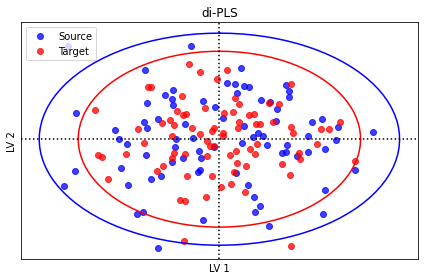

In [69]:
plt.figure()

# PLS projections (scores)
"""plt.subplot(1,2,1)
m.fit([0])
plt.plot(m.Ts[:, 0], m.Ts[:, 1], 'ob', MarkerEdgecolor='k', 
alpha=0.75)
plt.plot(m.Tt[:, 0], m.Tt[:, 1], 'or', MarkerEdgecolor='k', alpha=0.75)
plt.legend(['Source', 'Target'], loc=2)
el_source = fct.hellipse(m.Ts)
el_target = fct.hellipse(m.Tt)
plt.plot(el_source[0,:],el_source[1,:],'b')
plt.plot(el_target[0,:],el_target[1,:],'r')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False, left=False)
plt.axhline(y=0,color='k',linestyle=':')
plt.axvline(x=0,color='k',linestyle=':')
plt.title('Source PLS')
plt.xlabel('LV 1')
plt.ylabel('LV 2')"""

# di-PLS scores
plt.subplot(1,1,1)
#m.fit([1_000_000_000])
plt.plot(m_2.Ts[:, 0], m_2.Ts[:, 1], 'ob', 
alpha=0.75)
plt.plot(m_2.Tt[:, 0], m_2.Tt[:, 1], 'or', alpha=0.75)
plt.legend(['Source', 'Target'], loc=2)
el_source = hellipse(m_2.Ts)
el_target = hellipse(m_2.Tt)
plt.plot(el_source[0,:],el_source[1,:],'b')
plt.plot(el_target[0,:],el_target[1,:],'r')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False, left=False)
plt.axhline(y=0,color='k',linestyle=':')
plt.axvline(x=0,color='k',linestyle=':')
plt.title('di-PLS')
plt.xlabel('LV 1')
plt.ylabel('LV 2')
plt.tight_layout()